## 1. Import Dependencies

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping

#Set random seed for reproducibility
np.random.seed(42)

## 2. Loading the IMDB Dataset
The IMDB dataset is already preprocessed: reviews are represented as sequences

In [3]:
#Load IMDB Dataset

max_words = 10000       # Only keep the top 10,000 most frequent words
max_len = 200           # Limit reviews to 200 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad Sequences to ensure consistent length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Check Dataset Shape
print("Training Set Shape: ", x_train.shape)
print("Test Set Shape: ", x_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training Set Shape:  (25000, 200)
Test Set Shape:  (25000, 200)


## 3. Build RNN Model

In [4]:
# Build RNN Model

model = Sequential()
model.add(Embedding(input_dim = max_words, output_dim = 32, input_length=max_len))
model.add(SimpleRNN(32, return_sequences = False))      # Simple RNN Layer
model.add(Dense(1, activation='sigmoid'))               # Output Layer for Binary Classification

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

/home/sain/miniforge3/envs/CNN-test/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1730713997.790740   27932 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730713997.813892   27932 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1730713997.817457   27932 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4. Train the model
We'll train the model on the training data and use easly stopping to avoid overfitting.

In [5]:
easly_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10, batch_size=64,
                    validation_split=0.2,
                    callbacks=[easly_stopping])

Epoch 1/10


I0000 00:00:1730713999.207254   28114 service.cc:146] XLA service 0x7d137000a070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730713999.207272   28114 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-11-04 15:23:19.236716: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-04 15:23:19.366641: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90201


 13/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5173 - loss: 0.6969

I0000 00:00:1730714000.000391   28114 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5460 - loss: 0.6824 - val_accuracy: 0.6756 - val_loss: 0.6014
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7904 - loss: 0.4709 - val_accuracy: 0.7096 - val_loss: 0.5564
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8798 - loss: 0.2958 - val_accuracy: 0.8116 - val_loss: 0.4666
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9658 - loss: 0.1115 - val_accuracy: 0.7880 - val_loss: 0.5507
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9883 - loss: 0.0460 - val_accuracy: 0.8060 - val_loss: 0.6159
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9972 - loss: 0.0166 - val_accuracy: 0.7692 - val_loss: 0.7710


## 5. Evaluate the model
After training, we will evaluate the model to see how well it performs.

In [6]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7590 - loss: 0.7731
Test Accuracy: 76.02


## 6. Results

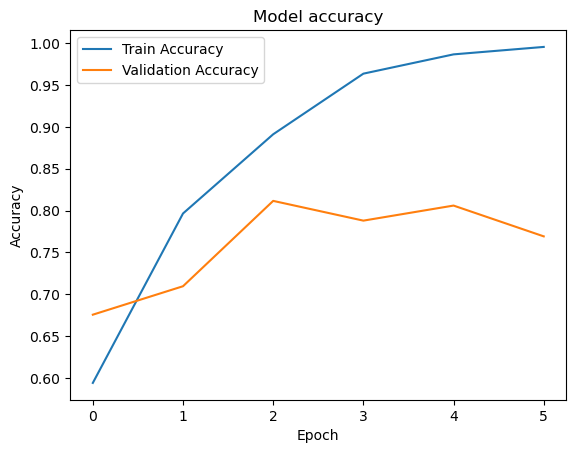

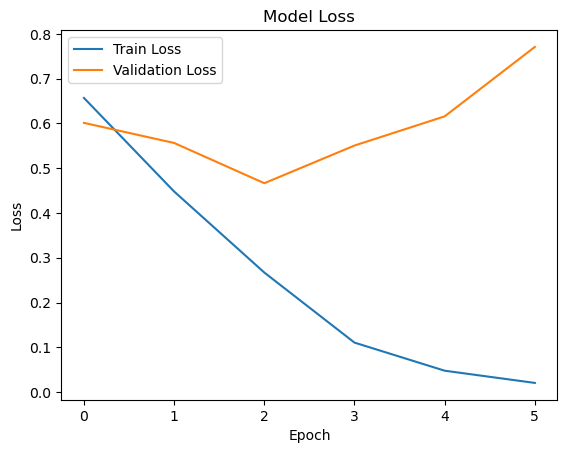

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 7. Make Predictions

In [8]:
predictions = model.predict(x_test)

# Convert probabilities to class labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


In [9]:
for i in range(10):
    print(f"Review: {i+1}")
    print(f"Predicted Sentiment: {'positive' if predicted_labels[i] == 1 else 'negative'}")
    print(f"True Sentiment: {'positive' if y_test[i] == 1 else 'negative'}")
    print("-" * 50)

Review: 1
Predicted Sentiment: negative
True Sentiment: negative
--------------------------------------------------
Review: 2
Predicted Sentiment: positive
True Sentiment: positive
--------------------------------------------------
Review: 3
Predicted Sentiment: positive
True Sentiment: positive
--------------------------------------------------
Review: 4
Predicted Sentiment: negative
True Sentiment: negative
--------------------------------------------------
Review: 5
Predicted Sentiment: positive
True Sentiment: positive
--------------------------------------------------
Review: 6
Predicted Sentiment: negative
True Sentiment: positive
--------------------------------------------------
Review: 7
Predicted Sentiment: positive
True Sentiment: positive
--------------------------------------------------
Review: 8
Predicted Sentiment: negative
True Sentiment: negative
--------------------------------------------------
Review: 9
Predicted Sentiment: positive
True Sentiment: negative
-------